Coeficientes β: [-1.139509   2.5133901]
Erro total (soma dos quadrados): 30.9559


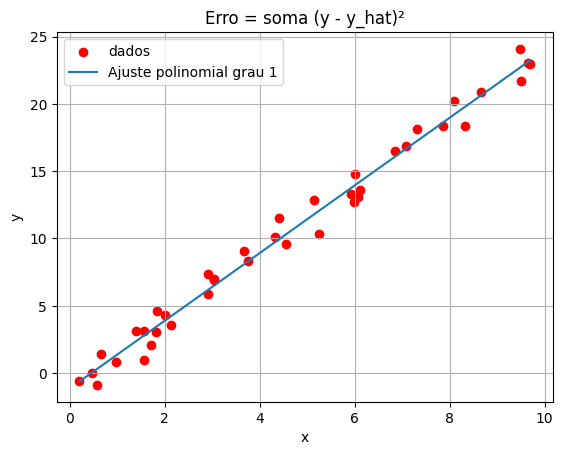

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Gerar dados simulados
# -------------------------
np.random.seed(42)
n = 40
x = np.random.uniform(0, 10, n)
y = 2.5 * x - 1.0 + np.random.normal(scale=1.0, size=n)

# -------------------------
# 2. Montar matriz de Vandermonde
# -------------------------
m = 1  # grau do polinômio (1 = reta)
X = np.vander(x, m + 1, increasing=True)

# -------------------------
# 3. Resolver o sistema normal
# -------------------------
A = X.T @ X
b = X.T @ y
beta = np.linalg.solve(A, b)

# -------------------------
# 4. Calcular predição e erro
# -------------------------
y_hat = X @ beta
erros = (y - y_hat)**2     # erro quadrático ponto a ponto
erro_total = np.sum(erros) # soma dos erros quadráticos

print(f"Coeficientes β: {beta}")
print(f"Erro total (soma dos quadrados): {erro_total:.4f}")

# -------------------------
# 5. Plotar resultados
# -------------------------
x_plot = np.linspace(min(x), max(x), 300)
X_plot = np.vander(x_plot, m + 1, increasing=True)
y_plot = X_plot @ beta

plt.scatter(x, y, color='red', label='dados')
plt.plot(x_plot, y_plot, label=f"Ajuste polinomial grau {m}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Erro = soma (y - y_hat)²')
plt.legend()
plt.grid(True)
plt.show()


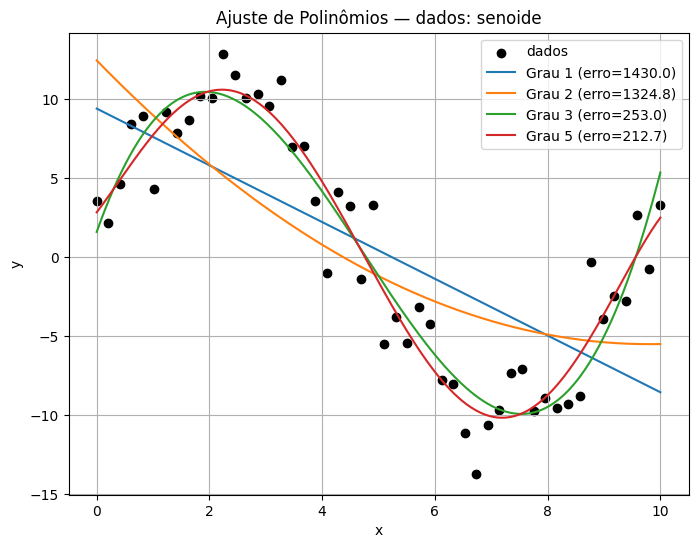

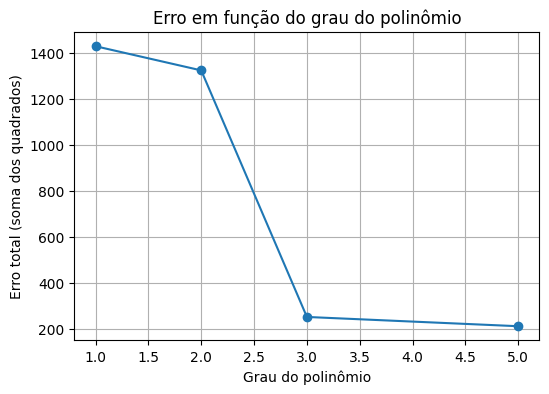

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Escolha o tipo de função geradora
tipo_dados = "senoide"   # opções: "linear", "quadratica", "cubica", "senoide"

np.random.seed(0)
n = 50
x = np.linspace(0, 10, n)

# -------------------------
# 1. Gerar dados simulados
# -------------------------
if tipo_dados == "linear":
    y = 2.5 * x - 1.0 + np.random.normal(scale=2.0, size=n)
elif tipo_dados == "quadratica":
    y = 0.5 * x**2 - 3 * x + 2 + np.random.normal(scale=4.0, size=n)
elif tipo_dados == "cubica":
    y = 0.1 * x**3 - 0.5 * x**2 + 2 * x + np.random.normal(scale=10.0, size=n)
elif tipo_dados == "senoide":
    y = 10 * np.sin(x / 1.5) + np.random.normal(scale=2.0, size=n)
else:
    raise ValueError("Escolha um tipo_dados válido.")

# -------------------------
# 2. Ajuste com vários graus
# -------------------------
graus = [1, 2, 3, 5]
erros_totais = []

x_plot = np.linspace(min(x), max(x), 400)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', label='dados')

for m in graus:
    # Matriz de Vandermonde e sistema normal
    X = np.vander(x, m + 1, increasing=True)
    A = X.T @ X
    b = X.T @ y
    beta = np.linalg.solve(A, b)

    # Predição e erro
    y_hat = X @ beta
    erro_total = np.sum((y - y_hat)**2)
    erros_totais.append(erro_total)

    # Curva ajustada
    X_plot = np.vander(x_plot, m + 1, increasing=True)
    y_plot = X_plot @ beta
    plt.plot(x_plot, y_plot, label=f'Grau {m} (erro={erro_total:.1f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Ajuste de Polinômios — dados: {tipo_dados}")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# 3. Gráfico do erro por grau
# -------------------------
plt.figure(figsize=(6, 4))
plt.plot(graus, erros_totais, 'o-')
plt.xlabel("Grau do polinômio")
plt.ylabel("Erro total (soma dos quadrados)")
plt.title("Erro em função do grau do polinômio")
plt.grid(True)
plt.show()
